In [1]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
BATCH_SIZE = 128

In [4]:
def building_le_net_5(input_shape = (32,32,1), num_classes=10, activation_function = 'relu'):
    inputs = layers.Input(shape=(32,32,1))

    # Block 1 : 
    x = layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, use_bias = False, padding='valid', name='conv1')(inputs)
    x = layers.BatchNormalization(name='BatchNorm1')(x)
    x = layers.Activation('relu', name='relu1')(x)
    x = layers.MaxPooling2D(pool_size=2, strides=2, name='pool1')(x)

    # Block 2 : 
    x = layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, use_bias = False, padding='valid', name='conv2')(x)
    x = layers.BatchNormalization(name='BatchNorm2')(x)
    x = layers.Activation('relu', name='relu2')(x)
    x = layers.MaxPooling2D(pool_size=2, strides=2, name='pool2')(x)

    # Dense Block 1 : 
    x = layers.Flatten(name='flatten')(x)
    
    x = layers.Dense(units=120, use_bias=False, name='dense_120')(x)
    x = layers.BatchNormalization(name='BatchNorm3')(x)
    x = layers.ReLU(name='relu3') (x)

    # Dense Block 2 : 
    x = layers.Dense(units=84, use_bias=False, name='dense_84')(x)
    x = layers.BatchNormalization(name='BatchNorm4')(x)
    x = layers.ReLU(name='relu4') (x)

    # Output Layer : 
    outputs = layers.Dense(units=num_classes, activation='softmax', name='Output')(x)
    
    return Model(inputs,outputs,name="LeNet5_Modern")

In [5]:
def preprocess_mnist(x,y):
    # Step 1
    # converts pixels from uint8 (integers 0…255) → float32 and scales them to 0…1.

    # Why:
    # 1. Neural nets train better when inputs are small-ish and consistent in scale.
    # 2. If you feed 0–255 directly, gradients can get weird and optimization becomes slower/less stable.
    # 3. float32 is the standard dtype for TensorFlow ops and GPU acceleration.

    x = tf.cast(x, tf.float32) / 255.0

    # Step 2
    # Conv2D layers in Keras expect 3D per image: (height, width, channels)
    
    # For the full batch:
    # before: (N, 28, 28)
    # after: (N, 28, 28, 1)

    # Why: 
    # 1. Conv2D operates over channels (RGB would be 3). Grayscale still needs the explicit 1.

    # axis=-1 means “add the new dimension at the very end” (the last axis).

    x = tf.expand_dims(x,axis=-1)


    # Step 3 Padding : 
    # input image dimensions : (N, 28, 28, 1)
    # expected input imaged dimensions : (N, 32, 32, 1)

    x = tf.pad(x, paddings=[[0,0],[2,2],[2,2],[0,0]])

    # Why zero-padding?
    # It adds a black border. That’s fine for MNIST because digits are centered and background is black-ish anyway.

    # Step 4 : 
    # What: ensures labels are integer dtype.
    
    # Why:
    # SparseCategoricalCrossentropy expects integer class indices (0–9).
    # MNIST labels already are integers, but casting avoids dtype edge cases and keeps things consistent.

    y = tf.cast(y, tf.int32)

    return x,y

    

In [6]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

Class distribution (train):
0:  5923  ( 9.87%)
1:  6742  (11.24%)
2:  5958  ( 9.93%)
3:  6131  (10.22%)
4:  5842  ( 9.74%)
5:  5421  ( 9.04%)
6:  5918  ( 9.86%)
7:  6265  (10.44%)
8:  5851  ( 9.75%)
9:  5949  ( 9.92%)


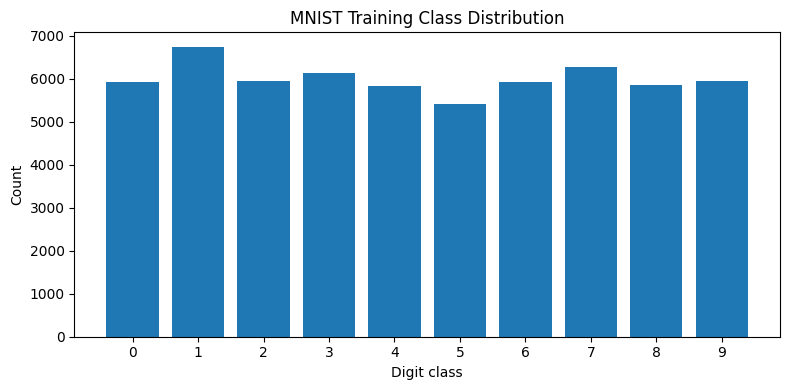

In [ ]:
NUM_CLASSES = 10

# y_train might be a tf.Tensor after your preprocess_mnist; handle both cases cleanly
y_np = y_train.numpy() if tf.is_tensor(y_train) else np.asarray(y_train)

counts = np.bincount(y_np, minlength=NUM_CLASSES)
total = counts.sum()
pct = counts / total * 100

print("Class distribution (train):")
for c in range(NUM_CLASSES):
    print(f"{c}: {counts[c]:5d}  ({pct[c]:5.2f}%)")

# Bar chart
plt.figure(figsize=(8,4))
plt.bar(range(NUM_CLASSES), counts)
plt.xticks(range(NUM_CLASSES))
plt.xlabel("Digit class")
plt.ylabel("Count")
plt.title("MNIST Training Class Distribution")
plt.tight_layout()
plt.show()

In [7]:
print(f"Type of x_train : {type(x_train)}")
print(f"Type of y_train : {type(y_train)}")

Type of x_train : <class 'numpy.ndarray'>
Type of y_train : <class 'numpy.ndarray'>


In [8]:
len(x_train)

60000

In [9]:
x_train.ndim

3

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
type(y_train)

numpy.ndarray

In [12]:
y_train.ndim

1

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
x_train, y_train = preprocess_mnist(x_train,y_train)
x_test, y_test = preprocess_mnist(x_test,y_test)

2026-02-20 17:46:49.994864: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2026-02-20 17:46:49.994905: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-20 17:46:49.994910: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
I0000 00:00:1771571809.994925  614280 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1771571809.994951  614280 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
x_train

<tf.Tensor: shape=(60000, 32, 32, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
  

In [16]:
x_train.ndim

4

In [17]:
y_train

<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([5, 0, 4, ..., 5, 6, 8], dtype=int32)>

In [18]:
train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(60000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

4) .prefetch(tf.data.AUTOTUNE)

What it does: overlaps data preparation with model training.

While your model is training on batch k, the input pipeline is already preparing batch k+1 in parallel.

So the model spends less time waiting for data.

Why AUTOTUNE:

TensorFlow automatically chooses a good prefetch buffer size depending on your system.

It’s the “let TensorFlow be the boring optimizer” option.

2) .shuffle(60000)

What it does: randomizes the order of samples each epoch.

The number 60000 is the shuffle buffer size.

How buffer shuffling works (important):

TensorFlow keeps a buffer of up to buffer_size elements.

It randomly picks from that buffer to output next.

Then it refills the buffer with new elements.

If buffer_size ≈ dataset size (MNIST train = 60,000), you get near-perfect shuffling.

Why shuffle matters:

If the data were ordered (e.g., lots of 0s then 1s then 2s…), your model would see weird streaks and training becomes less stable / slower.

Shuffling makes gradient updates more “representative” of the true data distribution.

Why 60000 specifically: because MNIST training set has 60,000 samples. Using the full size gives best randomness (at the cost of memory, but MNIST is tiny).

In [19]:
test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test,y_test))
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [20]:
model = building_le_net_5(input_shape=(32, 32, 1), num_classes=10, activation_function="relu")
model.summary()

Model: "LeNet5_Modern"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 6)      │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm1 (BatchNormalization) │ (None, 28, 28, 6)      │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 28, 28, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 16)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm2 (BatchNormalization) │ (None, 10, 10, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 120)            │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm3 (BatchNormalization) │ (None, 120)            │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (ReLU)                    │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 84)             │        10,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm4 (BatchNormalization) │ (None, 84)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (ReLU)                    │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,384 (243.69 KB)

 Trainable params: 61,932 (241.92 KB)

 Non-trainable params: 452 (1.77 KB)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [22]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("lenet5_mnist.keras", monitor="val_accuracy",
                                       save_best_only=True),
]

In [23]:
# -----------------------------
# Train
# -----------------------------
history = model.fit(
    train_ds,
    epochs=15,
    validation_data=test_ds,
    callbacks=callbacks,
)

Epoch 1/15


2026-02-20 17:47:19.928539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.9543 - loss: 0.1734 - val_accuracy: 0.9796 - val_loss: 0.0704
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9863 - loss: 0.0474 - val_accuracy: 0.9881 - val_loss: 0.0416
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9901 - loss: 0.0322 - val_accuracy: 0.9893 - val_loss: 0.0325
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9930 - loss: 0.0239 - val_accuracy: 0.9858 - val_loss: 0.0438
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9879 - val_loss: 0.0402
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9908 - val_loss: 0.0295
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9903 - val_loss: 0.0276
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accurac

In [29]:
# -----------------------------
# Evaluate
# -----------------------------
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")


Test accuracy: 0.9908 | Test loss: 0.0295


2026-02-20 17:56:49.801703: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


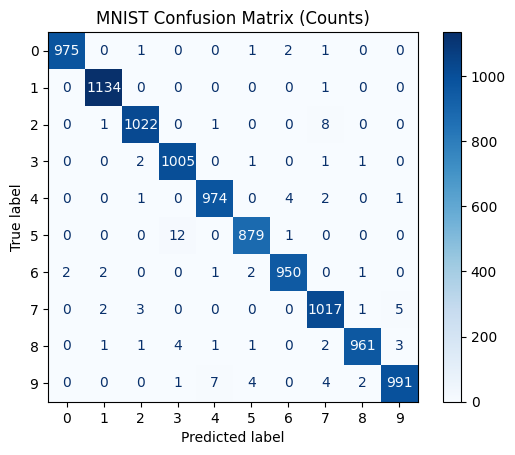

In [ ]:


# True labels from the dataset
y_true = np.concatenate([yb.numpy() for _, yb in test_ds], axis=0)

# Predictions directly on the dataset
y_prob = model.predict(test_ds, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred,
    labels=range(10),
    display_labels=range(10),
    cmap="Blues",
    values_format="d"
)
plt.title("MNIST Confusion Matrix (Counts)")
plt.show()